In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Importing data
import yfinance as yf
ticker = '^NDX'
start_date = '2009-01-01'
end_date =  '2016-01-01'
data = yf.Ticker(ticker).history(start=start_date, end=end_date)

In [3]:
# Preparing data
perc = 0.9
cut = int(np.floor(data.shape[0] * perc))
train = data.iloc[:cut]
test = data.iloc[cut:]

# Change later
df = train.copy()

In [4]:
### Editando
# Adicionando coluna 13 Week Treasury Bill
df['13 Week Treasury Bill'] = yf.Ticker('^IRX').history(start='2009-01-01', end='2016-01-01')['Close']

In [5]:
# Implementing Strategy
def calculate_rubber_band(df):
    df['ATR'] = (df['High'] - df['Low']).rolling(window=5).mean()
    df['High_5'] = df['High'].rolling(window=5).max()
    df['BandThreshold'] = df['High_5'] - 2.5 * df['ATR']
    return df

# function calls
df = calculate_rubber_band(df)

In [6]:
# Implementing Backtest
def backtest(df):
    signal = []
    for i in range(len(df)):
        if df['Close'][i] < df['BandThreshold'][i]:
            signal.append(1)  
        elif df['Close'][i] > df['High'].shift(1)[i]:
            signal.append(0)  
        else:
            signal.append(0) 
    df['Signal'] = signal
    return df

# function call
df = backtest(df)

C:\Users\arthu\AppData\Local\Temp\ipykernel_6192\489690647.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['Close'][i] < df['BandThreshold'][i]:
C:\Users\arthu\AppData\Local\Temp\ipykernel_6192\489690647.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['Close'][i] > df['High'].shift(1)[i]:


In [7]:
### Editando modelo
### Rendendo Tesouro quando o sinal é 1
df['StrategyReturns'] = 0.0
for i in range(1,len(df)):
    if df['Signal'][i-1] == 1:
        ret = (df['Close'][i] - df['Close'][i-1]) / df['Close'][i-1]
        df['StrategyReturns'][i] =  ret
    else:
        ret = (df['13 Week Treasury Bill'][i]+1)**(1/252) - 1
        df['StrategyReturns'][i] = ret

df

C:\Users\arthu\AppData\Local\Temp\ipykernel_6192\4014223572.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['Signal'][i-1] == 1:
C:\Users\arthu\AppData\Local\Temp\ipykernel_6192\4014223572.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret = (df['13 Week Treasury Bill'][i]+1)**(1/252) - 1
C:\Users\arthu\AppData\Local\Temp\ipykernel_6192\4014223572.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StrategyReturns

,Open,High,Low,Close,Volume,Dividends,Stock Splits,13 Week Treasury Bill,ATR,High_5,BandThreshold,Signal,StrategyReturns
Date,,,,,,,,,,,,,
2009-01-02 00:00:00-05:00,1212.739990,1266.449951,1208.910034,1263.699951,1438410000,0.0,0.0,0.085,NaN,NaN,NaN,0,0.000000
2009-01-05 00:00:00-05:00,1254.699951,1274.109985,1244.890015,1262.520020,1816580000,0.0,0.0,0.085,NaN,NaN,NaN,0,0.000324
2009-01-06 00:00:00-05:00,1274.359985,1286.079956,1265.530029,1274.489990,2137640000,0.0,0.0,0.130,NaN,NaN,NaN,0,0.000485
2009-01-07 00:00:00-05:00,1249.979980,1256.339966,1228.319946,1238.599976,2020170000,0.0,0.0,0.100,NaN,NaN,NaN,0,0.000378
2009-01-08 00:00:00-05:00,1231.750000,1252.520020,1223.810059,1252.520020,1968160000,0.0,0.0,0.080,32.807959,1286.079956,1204.060059,0,0.000305
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-15 00:00:00-04:00,4409.740234,4435.279785,4406.040039,4424.529785,1795530000,0.0,0.0,0.015,37.360059,4448.200195,4354.800049,0,0.000059
2015-04-16 00:00:00-04:00,4412.149902,4427.220215,4408.959961,4418.830078,1662850000,0.0,0.0,0.010,32.128125,4448.200195,4367.879883,0,0.000039
2015-04-17 00:00:00-04:00,4379.629883,4390.310059,4333.109863,4351.799805,1985190000,0.0,0.0,0.013,37.918164,4448.200195,4353.404785,1,0.000051


In [8]:
# Evaluating Backtest
# df['StrategyReturns'] = df['Signal'].shift(1) * df['Close'].pct_change()
df['StrategyCumulativeReturns'] = (1 + df['StrategyReturns']).cumprod()

# Cumulative returns for benchmarking (buy-and-hold)
df['BuyAndHoldReturns'] = df['Close'].pct_change()
df['BuyAndHoldCumulativeReturns'] = (1 + df['BuyAndHoldReturns']).cumprod()

# Total returns
total_return_strategy = df['StrategyCumulativeReturns'].iloc[-1] - 1
total_return_buy_and_hold = df['BuyAndHoldCumulativeReturns'].iloc[-1] - 1

#Printing total returns
print("Total Return - Strategy:", total_return_strategy)
print("Total Return - Buy and Hold:", total_return_buy_and_hold)

Total Return - Strategy: 1.0547574771724157
Total Return - Buy and Hold: 2.510311111712164


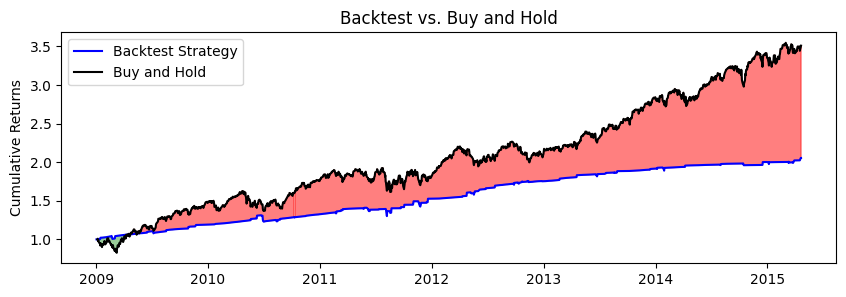

In [9]:
# Plotting
plt.figure(figsize=(10, 3))
plt.plot(df.index, df['StrategyCumulativeReturns'], color='blue', label='Backtest Strategy')
plt.plot(df.index, df['BuyAndHoldCumulativeReturns'], color='black', label='Buy and Hold')
plt.fill_between(df.index, df['StrategyCumulativeReturns'], df['BuyAndHoldCumulativeReturns'], \
                where=(df['StrategyCumulativeReturns'] <= df['BuyAndHoldCumulativeReturns']), \
                interpolate=True, color='red', alpha=0.5)
plt.fill_between(df.index, df['StrategyCumulativeReturns'], df['BuyAndHoldCumulativeReturns'], \
                where=(df['StrategyCumulativeReturns'] > df['BuyAndHoldCumulativeReturns']), 
                interpolate=True, color='green', alpha=0.4)
plt.title('Backtest vs. Buy and Hold')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()